# Régression linéaire à une variable - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

### Charger les données du fichier ex1data1.csv

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("ex1data1.csv")

### Visualiser les données

In [5]:
print(data.plot.scatter('population', 'profit'))


AxesSubplot(0.125,0.11;0.775x0.77)


### Découpez vos données en deux vecteurs X et y et transformerz-les en array numpy

Note: Les colonnes d'un Dataframe peuvent être sélectionnées par leur nom, de la même manière que dans un dictionnaire

In [6]:
data["population"]


0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598
5      8.3829
6      7.4764
7      8.5781
8      6.4862
9      5.0546
10     5.7107
11    14.1640
12     5.7340
13     8.4084
14     5.6407
15     5.3794
16     6.3654
17     5.1301
18     6.4296
19     7.0708
20     6.1891
21    20.2700
22     5.4901
23     6.3261
24     5.5649
25    18.9450
26    12.8280
27    10.9570
28    13.1760
29    22.2030
       ...   
67    10.2360
68     5.4994
69    20.3410
70    10.1360
71     7.3345
72     6.0062
73     7.2259
74     5.0269
75     6.5479
76     7.5386
77     5.0365
78    10.2740
79     5.1077
80     5.7292
81     5.1884
82     6.3557
83     9.7687
84     6.5159
85     8.5172
86     9.1802
87     6.0020
88     5.5204
89     5.0594
90     5.7077
91     7.6366
92     5.8707
93     5.3054
94     8.2934
95    13.3940
96     5.4369
Name: population, Length: 97, dtype: float64

In [7]:
X = data["population"]
y = data["profit"]


In [33]:
X = np.array(X, float)
y = np.array(y, float)


## Calcul d'une première prédiction

### Initialisez theta en un vecteur de deux valeurs à zéro

In [34]:
theta = np.zeros(2)
theta.T

array([0., 0.])

### Écrivez une fonction _predict_ qui prend en argument une population (x) ainsi que les parametres theta et prédit le profit (y) associé

In [35]:
X


array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [36]:
##def predict(X, theta):
##    X = np.c_[np.ones(np.size(X)), X]
##    return (np.matmul(X, theta.T))
def predict(X, theta):
    y = theta[0] + theta[1] * X
    return y

In [37]:
test1 = np.array([[2],[3],[4]])
test2 = np.array([1,2])
predict(test1, test2) 

array([[5],
       [7],
       [9]])

### Écrivez une fonction _fit_ qui prend en arguments le vecteur X et le vecteur y des données d'entraînement et renvoie le vecteur de paramètres _theta_ qui a été appris

In [38]:
m = np.size(X)
m

97

In [39]:
def fit(X, y, theta, alpha, num_iters):
    # Initialiser certaines variable utiles
    m = np.size(X)
    tmp1 = 0
    tmp2 = 0
    
    # Boucler sur le nombre d'itérations
    for i in range(num_iters):
        tmp1 = theta[0] - (alpha / m * np.sum(predict(X, theta) - y))
        tmp2 = theta[1] - (alpha / m * np.sum((predict(X, theta) - y)* X))
        
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)
        theta[0] = tmp1
        theta[1] = tmp2
        
    return theta

### Lancez l'apprentissage en appelant la fonction _fit_ et en prenant bien soin de récupérer le résultat de *theta* à la fin!! Vous devriez obtenir des valeurs autour de [-3.6303, 1.1664]

Pour commencer, on fixera alpha à 0.01 et num_iters à 1500

In [40]:
ret = fit(X, y, theta, 0.01, 1500)
ret

array([-3.63029144,  1.16636235])

## Visualiser la droite de régression

### Voici une fonction pour visualiser votre droite de régression (cadeau!) Vous pourrez l'appeler plus loin dans l'exercice

In [41]:
import matplotlib.pyplot as plt

def visualize(theta):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlim([4.5,22.5])
    ax.set_ylim([-5, 25])
    ax.scatter(X, y)
    line_x = np.linspace(0,22.5, 20)
    line_y = theta[0] + line_x * theta[1]
    ax.plot(line_x, line_y)
    plt.show()

### Appelez la fonction pour visualiser la droite avec différentes valeurs de theta

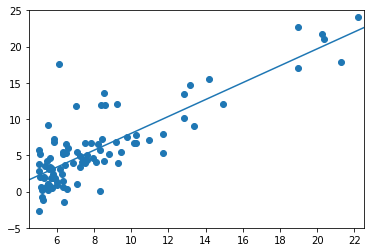

In [42]:
visualize(ret)

## Fonction de coût

Maintenant voyons comment resserrer notre analyse de l'algorithme et calculons le coût (ou la perte, ou l'erreur) à chaque itération.

### Définissez la fonction de coût de votre modèle

In [44]:
def cost(X, y, theta):
    m = np.size(X)
    return (1 / (2 * m) * np.sum((predict(X, theta) - y)**2)) 


### Testez-la avec theta = [0,0]   Vous devriez obtenir environ 32.07

In [45]:
cost(X, y, [0,0])

32.072733877455676

### Maintenant avec theta = [-1,2]. Vous devriez obtenir environ 54.24

In [46]:
cost(X, y, [-1,2])

54.24245508201238

### Copiez le code de votre fonction _fit_ et ajoutez-y un appel à la fonction _cost_, à chaque itération. Vous stockerez vos résultats dans une liste nommée J_history, que vous retournerez avec *theta* à la fin de la fonction

Et oui, en Python, une fonction peut retourner plus qu'une variable!!

In [51]:
def fit_with_cost(X, y, theta, alpha, num_iters):
   # À compléter
    # Initialiser certaines variable utiles
    m = np.size(X)
    tmp1 = 0
    tmp2 = 0
    j_history = []
    
    # Boucler sur le nombre d'itérations
    for i in range(num_iters):
        tmp1 = theta[0] - (alpha / m * np.sum(predict(X, theta) - y))
        tmp2 = theta[1] - (alpha / m * np.sum((predict(X, theta) - y)* X))
        j_history.append(cost(X, y, theta))
        
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)
        theta[0] = tmp1
        theta[1] = tmp2

    return theta, j_history

### Appelez la fonction en récupérant les valeurs de theta et J_history

In [52]:
# D'abord on réinitialise theta à zéro
theta = np.zeros(2)

In [56]:
# Lancez l'entraînement avec votre nouvelle fonction
ret, J_history = fit_with_cost(X, y, theta, 0.01, 1500)

### On visualise maintenant l'évolution du coût en fonction du nombre d'itérations

Vous pouvez voir si en modifiant les valeurs d'alpha et de num_iters, le graphique change d'allure

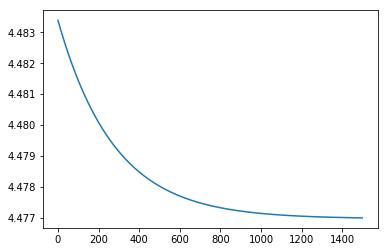

In [57]:
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)